In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [144]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [145]:
path = '/content/drive/MyDrive/Datathon/Data/'

In [146]:
df = pd.read_csv('/content/drive/MyDrive/Python stuff/train.csv')

In [147]:
df

,Rhythm,vibrance,key,Decibel_Levels,mode,lyrics_amount,acoustics,instruments,bounce,valence,Beats_Speed,type,TimeLength,title,Hyperactivity,MusicEraRating,genre
0,3.9262,7.67,7,-8.565,1,1.2160,0.006460,0.872000,0.6840,0.0358,150.040,audio_features,182400,NaN,5.371432,19,Dark Trap
1,5.5141,7.83,0,-6.274,1,0.6160,0.210000,0.000000,0.2260,0.1990,141.882,audio_features,191437,NaN,28.234518,1,Rhythm & Blues
2,4.5024,7.70,8,-5.454,1,1.1800,0.016900,0.000000,0.1600,0.6670,164.140,audio_features,297920,NaN,109.481380,9,Rhythm & Blues
3,5.0652,6.48,0,-5.287,1,0.2924,0.118000,0.000000,1.0300,0.6570,161.958,audio_features,166146,NaN,106.406406,11,Hiphop
4,3.0485,8.97,1,-4.487,0,0.1632,0.014300,0.000220,0.6000,0.1040,149.992,audio_features,184000,Ready2GetMaggot?,15.599168,4,hardstyle
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15859,4.9044,6.63,6,-7.616,0,0.7680,0.081900,0.000000,0.2300,0.2270,139.964,audio_features,210587,NaN,31.771828,13,Hiphop
15860,3.3768,9.65,10,-1.918,0,0.2104,0.000597,0.835000,0.3260,0.4070,175.029,audio_features,323809,Drum and Bass 2020,71.236803,17,Drums & Bass
15861,5.2260,4.02,5,-9.255,0,0.5960,0.188000,0.000000,0.1194,0.4830,160.046,audio_features,169046,NaN,77.302218,9,Rap
15862,2.8006,9.39,11,-7.750,0,0.2132,0.000205,0.885000,0.6720,0.0863,137.983,audio_features,261000,Top Trance Songs EVER,11.907933,8,trance


In [148]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15864 entries, 0 to 15863
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Rhythm          15791 non-null  float64
 1   vibrance        15853 non-null  float64
 2   key             15864 non-null  int64  
 3   Decibel_Levels  15864 non-null  float64
 4   mode            15864 non-null  int64  
 5   lyrics_amount   15864 non-null  float64
 6   acoustics       15807 non-null  float64
 7   instruments     15864 non-null  float64
 8   bounce          15864 non-null  float64
 9   valence         15864 non-null  float64
 10  Beats_Speed     15863 non-null  float64
 11  type            15864 non-null  object 
 12  TimeLength      15864 non-null  int64  
 13  title           7834 non-null   object 
 14  Hyperactivity   15864 non-null  float64
 15  MusicEraRating  15864 non-null  int64  
 16  genre           15864 non-null  object 
dtypes: float64(10), int64(4), objec

In [149]:
df.isnull().sum()

Rhythm              73
vibrance            11
key                  0
Decibel_Levels       0
mode                 0
lyrics_amount        0
acoustics           57
instruments          0
bounce               0
valence              0
Beats_Speed          1
type                 0
TimeLength           0
title             8030
Hyperactivity        0
MusicEraRating       0
genre                0
dtype: int64

In [150]:
df.describe(include='all')

,Rhythm,vibrance,key,Decibel_Levels,mode,lyrics_amount,acoustics,instruments,bounce,valence,Beats_Speed,type,TimeLength,title,Hyperactivity,MusicEraRating,genre
count,15791.000000,15853.000000,15864.000000,15864.000000,15864.000000,15864.000000,15807.000000,15864.000000,15864.000000,15864.000000,15863.000000,15864,15864.000000,7834,15864.000000,15864.000000,15864
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,132,NaN,NaN,15
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,audio_features,NaN,Euphoric Hardstyle,NaN,NaN,Hipstter-Hop
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15864,NaN,520,NaN,NaN,2193
mean,4.267562,7.639881,5.373991,-6.436073,0.553328,0.547096,0.095136,0.284345,0.426533,0.355890,147.588349,NaN,251407.346067,NaN,52.843281,10.026349,NaN
std,1.048934,1.839722,3.661203,2.924697,0.497164,0.507769,0.167144,0.371601,0.350292,0.232668,23.877106,NaN,103054.074236,NaN,36.524006,5.487201,NaN
min,0.436170,0.002430,0.000000,-32.929000,0.000000,0.090800,0.000002,0.000000,0.024200,0.018700,66.424000,NaN,38333.000000,NaN,2.394198,1.000000,NaN
25%,3.497400,6.320000,1.000000,-8.161000,0.000000,0.196000,0.001680,0.000000,0.199000,0.160000,129.969500,NaN,180383.750000,NaN,22.797012,5.000000,NaN
50%,4.294700,8.060000,6.000000,-6.199000,1.000000,0.300800,0.016000,0.006255,0.270000,0.322000,144.977000,NaN,225211.500000,NaN,46.088793,10.000000,NaN
75%,5.112100,9.250000,9.000000,-4.499000,1.000000,0.772000,0.107000,0.726000,0.586000,0.519000,161.937500,NaN,302419.750000,NaN,76.144690,15.000000,NaN


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fcee5ec8510>]],
      dtype=object)

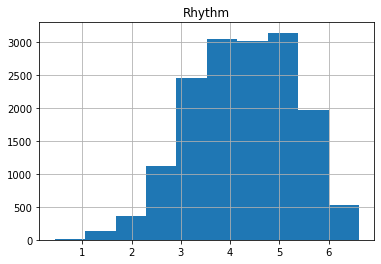

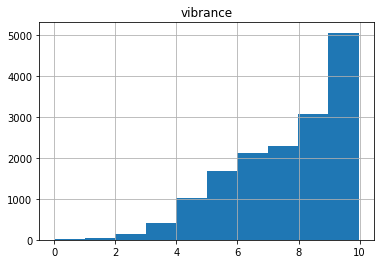

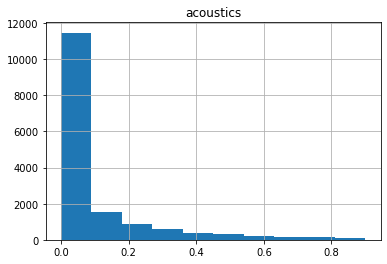

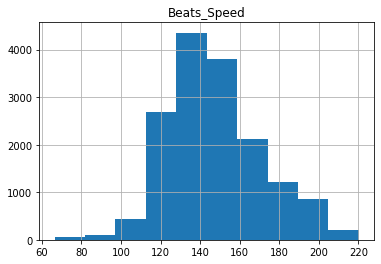

In [151]:
#Histograms of missing variables
df.hist('Rhythm')
df.hist('vibrance')
df.hist('acoustics')
df.hist('Beats_Speed')

In [152]:
#Imputing the numerical variables:
df['Rhythm'] = df['Rhythm'].fillna(df.Rhythm.mean())
df['vibrance'] = df['vibrance'].fillna(df.vibrance.median())
df['acoustics'] = df['acoustics'].fillna(df.acoustics.median())
df['Beats_Speed'] = df['Beats_Speed'].fillna(df.Beats_Speed.mean())

#Imputing the non-numerical variable
df['title'] = df['title'].fillna('')

In [153]:
df.isnull().sum()

Rhythm            0
vibrance          0
key               0
Decibel_Levels    0
mode              0
lyrics_amount     0
acoustics         0
instruments       0
bounce            0
valence           0
Beats_Speed       0
type              0
TimeLength        0
title             0
Hyperactivity     0
MusicEraRating    0
genre             0
dtype: int64

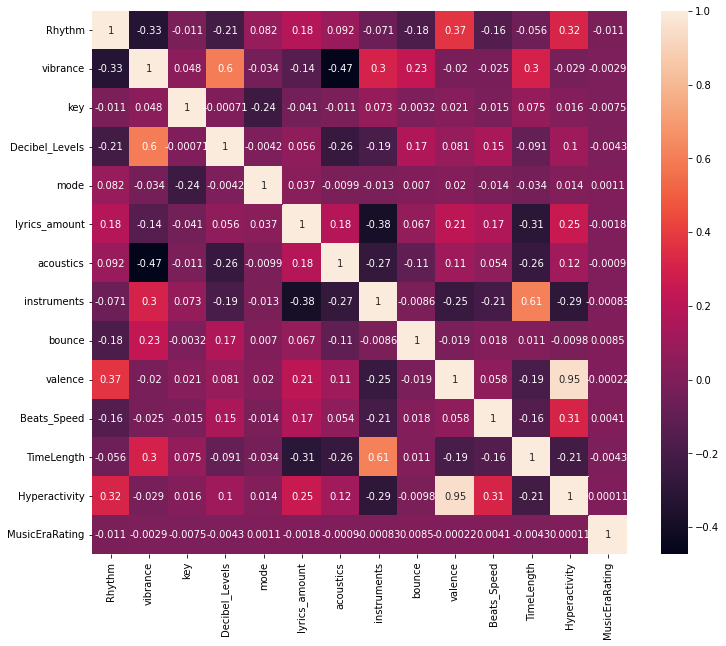

In [154]:
plt.figure(figsize=(12, 10)) # Set the figure size
sns.heatmap(df.corr(), annot=True) # Print the heatmap

In [155]:
df.head()

,Rhythm,vibrance,key,Decibel_Levels,mode,lyrics_amount,acoustics,instruments,bounce,valence,Beats_Speed,type,TimeLength,title,Hyperactivity,MusicEraRating,genre
0,3.9262,7.67,7,-8.565,1,1.2160,0.00646,0.87200,0.684,0.0358,150.040,audio_features,182400,,5.371432,19,Dark Trap
1,5.5141,7.83,0,-6.274,1,0.6160,0.21000,0.00000,0.226,0.1990,141.882,audio_features,191437,,28.234518,1,Rhythm & Blues
2,4.5024,7.70,8,-5.454,1,1.1800,0.01690,0.00000,0.160,0.6670,164.140,audio_features,297920,,109.481380,9,Rhythm & Blues
3,5.0652,6.48,0,-5.287,1,0.2924,0.11800,0.00000,1.030,0.6570,161.958,audio_features,166146,,106.406406,11,Hiphop
4,3.0485,8.97,1,-4.487,0,0.1632,0.01430,0.00022,0.600,0.1040,149.992,audio_features,184000,Ready2GetMaggot?,15.599168,4,hardstyle


In [156]:
df[['key', 'mode', 'type', 'MusicEraRating', 'genre','title']].nunique(axis=0)

key                12
mode                2
type                1
MusicEraRating     19
genre              15
title             133
dtype: int64

In [157]:
for i in ['key', 'mode', 'type', 'MusicEraRating', 'genre','title']:
  print(f'{i} - {df[i].unique()}', end='\n\n')

key - [ 7  0  8  1  6  9  5 11 10  3  2  4]

mode - [1 0]

type - ['audio_features']

MusicEraRating - [19  1  9 11  4  7  6 15 12 10 13  8 16  5 14  3  2 17 18]

genre - ['Dark Trap' 'Rhythm & Blues' 'Hiphop' 'hardstyle' 'trance' 'Drums & Bass'
 'Hipstter-Hop' 'Electro' 'psytrance' 'Pop' 'trap' 'Emotional' 'Rap'
 'techno' 'Industrial Trap']

title - ['' 'Ready2GetMaggot?' 'Top Trance Songs EVER'
 'UKF Drum & Bass - All Uploads' 'Liqduicity Drum & Bass'
 'Tech House Elrow Secrets' 'ASOT' 'blanc | Tech House'
 'BOILER ROOM TECHNO HOUSE' 'Best of Hardstyle 2020'
 'PSYTRANCE BANGERS best new 2020' 'Trance 100 Chart - by Armada Music'
 'Euphoric Hardstyle' "I'm a fucking Headbanger"
 'Best Hardstyle ever made' 'Dirtybird//Techhouse by Mack\\' 'RIDDIM'
 'PsyTrance 2020 felipe' 'UPLIFTING TRANCE 2020' 'Dirtybird House'
 'State if Trance (The best ASOT Epsidoes)'
 'Techno Music 2020 | Best Techno' 'Liquid Drum & Bass' 'Best of Trance'
 'PsytranceL Full on Progressive (&Goa)' 'Tech House 2020'

In [158]:
from sklearn.preprocessing import LabelEncoder
labelenc = LabelEncoder()
df['type'] = labelenc.fit_transform(df['type'])
df['title'] = labelenc.fit_transform(df['title'])
df.iloc[:10,:]

,Rhythm,vibrance,key,Decibel_Levels,mode,lyrics_amount,acoustics,instruments,bounce,valence,Beats_Speed,type,TimeLength,title,Hyperactivity,MusicEraRating,genre
0,3.9262,7.67,7,-8.565,1,1.2160,0.00646,0.872000,0.6840,0.0358,150.040,0,182400,0,5.371432,19,Dark Trap
1,5.5141,7.83,0,-6.274,1,0.6160,0.21000,0.000000,0.2260,0.1990,141.882,0,191437,0,28.234518,1,Rhythm & Blues
2,4.5024,7.70,8,-5.454,1,1.1800,0.01690,0.000000,0.1600,0.6670,164.140,0,297920,0,109.481380,9,Rhythm & Blues
3,5.0652,6.48,0,-5.287,1,0.2924,0.11800,0.000000,1.0300,0.6570,161.958,0,166146,0,106.406406,11,Hiphop
4,3.0485,8.97,1,-4.487,0,0.1632,0.01430,0.000220,0.6000,0.1040,149.992,0,184000,77,15.599168,4,hardstyle
5,4.4756,9.40,6,-6.742,1,0.1456,0.02240,0.682000,0.1150,0.8220,135.975,0,202493,113,111.771450,7,trance
6,3.0418,7.73,7,-6.763,0,0.1352,0.02230,0.406000,0.1832,0.1010,174.075,0,272414,121,17.581575,6,Drums & Bass
7,3.3165,8.84,1,-4.112,0,0.1384,0.04650,0.000578,0.2120,0.1710,174.043,0,232069,48,29.761353,15,Drums & Bass
8,5.9831,6.76,9,-4.867,0,0.9080,0.32400,0.000000,0.1936,0.8040,125.923,0,152213,0,101.242092,7,Hipstter-Hop
9,3.5309,9.97,8,-3.744,0,0.4120,0.00447,0.797000,0.3580,0.4260,170.062,0,257525,121,72.446412,6,Drums & Bass


In [159]:
def encodeCols(data):
  for i, row in data.iterrows():
    data.at[i, 'title'] = 0

#encodeCols(df)
#df

In [160]:
#df = pd.get_dummies(df, columns=['key', 'MusicEraRating'])
#df

In [161]:
df.describe(include='all')

,Rhythm,vibrance,key,Decibel_Levels,mode,lyrics_amount,acoustics,instruments,bounce,valence,Beats_Speed,type,TimeLength,title,Hyperactivity,MusicEraRating,genre
count,15864.000000,15864.000000,15864.000000,15864.000000,15864.000000,15864.000000,15864.000000,15864.000000,15864.000000,15864.000000,15864.000000,15864.0,15864.000000,15864.000000,15864.000000,15864.000000,15864
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Hipstter-Hop
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2193
mean,4.267562,7.640172,5.373991,-6.436073,0.553328,0.547096,0.094851,0.284345,0.426533,0.355890,147.588349,0.0,251407.346067,32.033535,52.843281,10.026349,NaN
std,1.046518,1.839117,3.661203,2.924697,0.497164,0.507769,0.166910,0.371601,0.350292,0.232668,23.876354,0.0,103054.074236,42.503511,36.524006,5.487201,NaN
min,0.436170,0.002430,0.000000,-32.929000,0.000000,0.090800,0.000002,0.000000,0.024200,0.018700,66.424000,0.0,38333.000000,0.000000,2.394198,1.000000,NaN
25%,3.504100,6.320000,1.000000,-8.161000,0.000000,0.196000,0.001697,0.000000,0.199000,0.160000,129.969750,0.0,180383.750000,0.000000,22.797012,5.000000,NaN
50%,4.288000,8.060000,6.000000,-6.199000,1.000000,0.300800,0.016000,0.006255,0.270000,0.322000,144.977000,0.0,225211.500000,0.000000,46.088793,10.000000,NaN
75%,5.112100,9.250000,9.000000,-4.499000,1.000000,0.772000,0.106000,0.726000,0.586000,0.519000,161.936250,0.0,302419.750000,57.000000,76.144690,15.000000,NaN


In [162]:
def makeCountPlot(data, width=0, height=4, hue=None):
  if width == 0:
    width = len(data.unique())*1.25
  plt.figure(figsize=(width, height))
  sns.countplot(x=data, hue=hue)

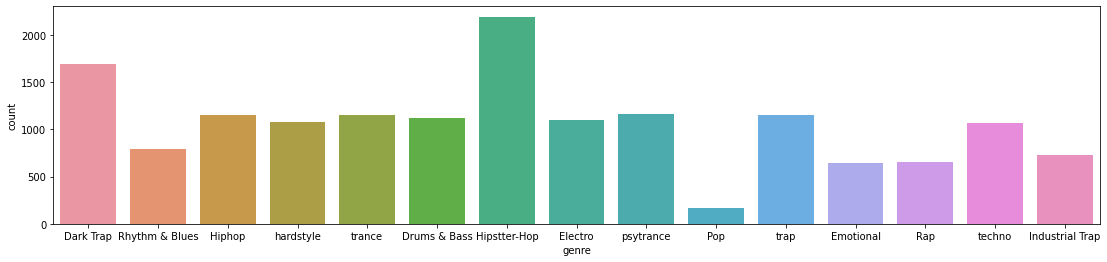

In [163]:
makeCountPlot(data=df['genre'])

In [164]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
x = df.drop(columns=['genre'])
y = np.array(df['genre'], dtype='object')
mms = MinMaxScaler() # Creating an instance of this class
ss = StandardScaler()
x = ss.fit_transform(x)
x = mms.fit_transform(x)
x = pd.DataFrame(x, columns=df.drop(columns=['genre']).columns)
x

,Rhythm,vibrance,key,Decibel_Levels,mode,lyrics_amount,acoustics,instruments,bounce,valence,Beats_Speed,type,TimeLength,title,Hyperactivity,MusicEraRating
0,0.564417,0.768481,0.636364,0.687705,1.0,0.305329,0.007175,0.882591,0.338047,0.017788,0.543434,0.0,0.176300,0.000000,0.015236,1.000000
1,0.821216,0.784517,0.000000,0.752371,1.0,0.142516,0.233332,0.000000,0.103392,0.187559,0.490414,0.0,0.187359,0.000000,0.132235,0.000000
2,0.657601,0.771487,0.727273,0.775517,1.0,0.295561,0.018775,0.000000,0.069577,0.674399,0.635072,0.0,0.317666,0.000000,0.548008,0.444444
3,0.748618,0.649213,0.000000,0.780230,1.0,0.054705,0.131109,0.000000,0.515319,0.663997,0.620891,0.0,0.156410,0.000000,0.532272,0.555556
4,0.422473,0.898773,0.090909,0.802811,0.0,0.019646,0.015887,0.000223,0.295010,0.088734,0.543122,0.0,0.178258,0.583333,0.067575,0.166667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15859,0.722614,0.664247,0.545455,0.714491,0.0,0.183762,0.090998,0.000000,0.105441,0.216686,0.477948,0.0,0.210794,0.000000,0.150337,0.666667
15860,0.475566,0.966926,0.909091,0.875325,0.0,0.032454,0.000661,0.845142,0.154626,0.403932,0.705841,0.0,0.349348,0.189394,0.352295,0.888889
15861,0.774623,0.402660,0.454545,0.668229,0.0,0.137089,0.208887,0.000000,0.048775,0.482992,0.608465,0.0,0.159958,0.000000,0.383334,0.444444
15862,0.382382,0.940867,1.000000,0.710709,0.0,0.033214,0.000225,0.895749,0.331899,0.070321,0.465074,0.0,0.272486,0.856061,0.048686,0.388889


In [165]:
x_tr, x_test, y_tr, y_test = train_test_split(x, y, stratify=y)
x_train, x_val, y_train, y_val = train_test_split(x_tr, y_tr, stratify=y_tr)

In [166]:
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
# model = GaussianNB()
#model = DecisionTreeClassifier()
model = RandomForestClassifier(n_estimators=1400, max_depth=500, max_features='auto')

#clf.fit(x_train,y_train)

#rfcpred = clf.predict(x_val)

In [167]:
model.fit(x_train, y_train)


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=500, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1400,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [168]:
pred = model.predict(x_val)
print(classification_report(pred, y_val))

                 precision    recall  f1-score   support

      Dark Trap       0.58      0.57      0.58       323
   Drums & Bass       1.00      1.00      1.00       211
        Electro       0.94      0.94      0.94       206
      Emotional       0.74      0.71      0.73       126
         Hiphop       0.41      0.44      0.42       199
   Hipstter-Hop       0.61      0.41      0.49       610
Industrial Trap       0.23      0.36      0.28        85
            Pop       0.03      0.50      0.06         2
            Rap       0.33      0.73      0.45        55
 Rhythm & Blues       0.24      0.34      0.28       106
      hardstyle       0.99      0.98      0.98       203
      psytrance       0.96      1.00      0.98       209
         techno       0.94      0.90      0.92       210
         trance       0.94      0.96      0.95       213
           trap       0.98      0.97      0.98       217

       accuracy                           0.72      2975
      macro avg       0.66   

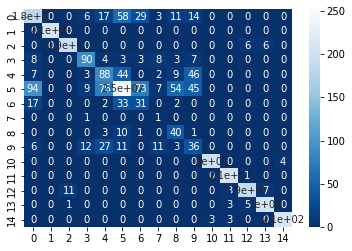

In [169]:
sns.heatmap(confusion_matrix(pred, y_val), annot=True, cmap='Blues_r')

In [170]:
tdf = pd.read_csv('/content/drive/MyDrive/Python stuff/test_x.csv')
tdf

,id,Rhythm,vibrance,key,Decibel_Levels,mode,lyrics_amount,acoustics,instruments,bounce,valence,Beats_Speed,type,TimeLength,title,Hyperactivity,MusicEraRating,Usage
0,640,5.1724,5.97,6,-6.726,0,0.4320,0.240000,0.0000,0.2140,0.266,139.937,audio_features,133000,NaN,37.223242,2,Public
1,11990,6.2444,7.05,11,-7.835,0,0.7720,0.764000,0.0240,0.2160,0.528,118.996,audio_features,98899,NaN,62.829888,3,Public
2,5990,2.8743,9.22,11,-3.789,1,0.2304,0.030700,0.1370,0.3280,0.569,174.967,audio_features,271273,Liqduicity Drum & Bass,99.556223,18,Public
3,16887,3.5041,8.60,11,-2.810,0,0.1504,0.023900,0.0191,0.4020,0.307,155.002,audio_features,139200,Euphoric Hardstyle,47.585614,12,Public
4,12783,5.0183,6.05,8,-9.359,0,0.3440,0.001860,0.0381,0.2300,0.966,142.024,audio_features,251733,NaN,137.195184,14,Public
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5283,6826,5.0518,9.50,6,-7.612,1,0.1596,0.000499,0.8820,0.2260,0.159,135.005,audio_features,522667,PsyTrance 2020 felipe,21.465795,3,Private
5284,4352,1.3802,9.08,9,-4.291,0,0.4160,0.000033,0.0008,0.7840,0.206,164.197,audio_features,184920,NaN,33.824582,2,Private
5285,19587,5.9898,6.51,2,-6.385,1,0.5600,0.030300,0.7210,0.1352,0.663,123.999,audio_features,249919,Tech House Bangerz,82.211337,8,Private
5286,9685,5.5677,8.14,2,-7.364,1,1.6800,0.059800,0.0134,0.1112,0.389,156.985,audio_features,124539,NaN,61.067165,14,Private


In [171]:
tdf.isnull().sum()

id                   0
Rhythm              22
vibrance             0
key                  0
Decibel_Levels       0
mode                 0
lyrics_amount        0
acoustics           20
instruments          0
bounce               0
valence              0
Beats_Speed          0
type                 0
TimeLength           0
title             2704
Hyperactivity        0
MusicEraRating       0
Usage                0
dtype: int64

In [172]:
tdf.head()

,id,Rhythm,vibrance,key,Decibel_Levels,mode,lyrics_amount,acoustics,instruments,bounce,valence,Beats_Speed,type,TimeLength,title,Hyperactivity,MusicEraRating,Usage
0,640,5.1724,5.97,6,-6.726,0,0.4320,0.24000,0.0000,0.214,0.266,139.937,audio_features,133000,NaN,37.223242,2,Public
1,11990,6.2444,7.05,11,-7.835,0,0.7720,0.76400,0.0240,0.216,0.528,118.996,audio_features,98899,NaN,62.829888,3,Public
2,5990,2.8743,9.22,11,-3.789,1,0.2304,0.03070,0.1370,0.328,0.569,174.967,audio_features,271273,Liqduicity Drum & Bass,99.556223,18,Public
3,16887,3.5041,8.60,11,-2.810,0,0.1504,0.02390,0.0191,0.402,0.307,155.002,audio_features,139200,Euphoric Hardstyle,47.585614,12,Public
4,12783,5.0183,6.05,8,-9.359,0,0.3440,0.00186,0.0381,0.230,0.966,142.024,audio_features,251733,NaN,137.195184,14,Public


In [173]:
tdf['Rhythm'] = tdf['Rhythm'].fillna(tdf.Rhythm.mean())
tdf['acoustics'] = tdf['acoustics'].fillna(tdf.acoustics.median())
tdf['title'] = tdf['title'].fillna('')
from sklearn.preprocessing import LabelEncoder
labelenc = LabelEncoder()
tdf['type'] = labelenc.fit_transform(tdf['type'])
tdf['title'] = labelenc.fit_transform(tdf['title'])
#encodeCols(tdf)
#tdf = pd.get_dummies(tdf, columns=['key', 'MusicEraRating'])
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
xt = tdf.drop(columns=['id','Usage'])
mms = MinMaxScaler() # Creating an instance of this class
ss = StandardScaler()
xt = ss.fit_transform(xt)
xt = mms.fit_transform(xt)
xt = pd.DataFrame(xt, columns=tdf.drop(columns=['id','Usage']).columns)

In [174]:
predez = model.predict(xt)

In [175]:
predez

array(['Hipstter-Hop', 'Hipstter-Hop', 'Drums & Bass', ..., 'Electro',
       'Hipstter-Hop', 'psytrance'], dtype=object)

In [176]:
gg=pd.DataFrame(predez)

In [177]:
gg

,0
0,Hipstter-Hop
1,Hipstter-Hop
2,Drums & Bass
3,hardstyle
4,Hiphop
...,...
5283,psytrance
5284,Emotional
5285,Electro
5286,Hipstter-Hop


In [178]:
#submission = gg.to_csv()

In [119]:
gg.to_csv('Submission3.csv')

In [120]:
#Submission.csv

In [121]:
#submission